In [1]:
if 'libraries_imported' not in globals():
    libraries_imported = False

if libraries_imported == False:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from datetime import datetime, timedelta
    from datetime import datetime
    from scipy.interpolate import make_interp_spline
    import plotly.graph_objects as go
    from scipy.signal import butter, filtfilt
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.layers import Input
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import RobustScaler
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.preprocessing import RobustScaler
    import joblib

2025-03-13 15:16:30.958785: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 15:16:30.959629: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-13 15:16:30.962636: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-13 15:16:30.971703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741878990.986809   24154 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741878990.99

In [2]:
title = 'datasets/SaniWASE_Data_Cleaned_t1.csv'  # Ensure the file name includes .csv
feed_analysis_df = pd.read_csv(title)  # Load the CSV file

if not isinstance(feed_analysis_df.columns[0], str):
    new_header = feed_analysis_df.iloc[0]  # This grabs the first row for the header
    feed_analysis_df = feed_analysis_df[1:]  # Take the data less the header row
    feed_analysis_df.columns = new_header  # Set the header row as the DataFrame header

# Remove duplicate indices if they exist
feed_analysis_df = feed_analysis_df[~feed_analysis_df.index.duplicated(keep='first')]

# Convert 'datetime' column to datetime format
feed_analysis_df['datetime'] = pd.to_datetime(feed_analysis_df['datetime'], format='%d.%m.%y', errors='raise')
feed_analysis_df['date'] = feed_analysis_df['datetime'].dt.date

# Optional: apply_date_range_df function can be defined and used here if needed
# df = apply_date_range_df(df)

# Sorting values by date
feed_analysis_df = feed_analysis_df.sort_values(by='date')

# Drop specified columns
columns_to_drop = ['datetime', 'fos', 'tac', 'index', 'fos', 'tac', 'f/m_ratio',  't1_olr', 'eq_cod', 't1_cod']
feed_analysis_df = feed_analysis_df.drop(columns=columns_to_drop)


display(feed_analysis_df.columns)






Index(['eq_ph', 'feed_vol', 't1_ph', 'current', 'temp', 'methane_percentage',
       'h2s_ppm', 'hrt', 'biogas_vol', 'fostac', 'date'],
      dtype='object')

In [3]:
df = feed_analysis_df.copy()
df.set_index('date', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.reset_index(inplace=True)




df_interpolated = df.interpolate()
df_interpolated = df.interpolate().bfill()

/tmp/ipykernel_24154/2991979751.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate()
/tmp/ipykernel_24154/2991979751.py:10: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate().bfill()


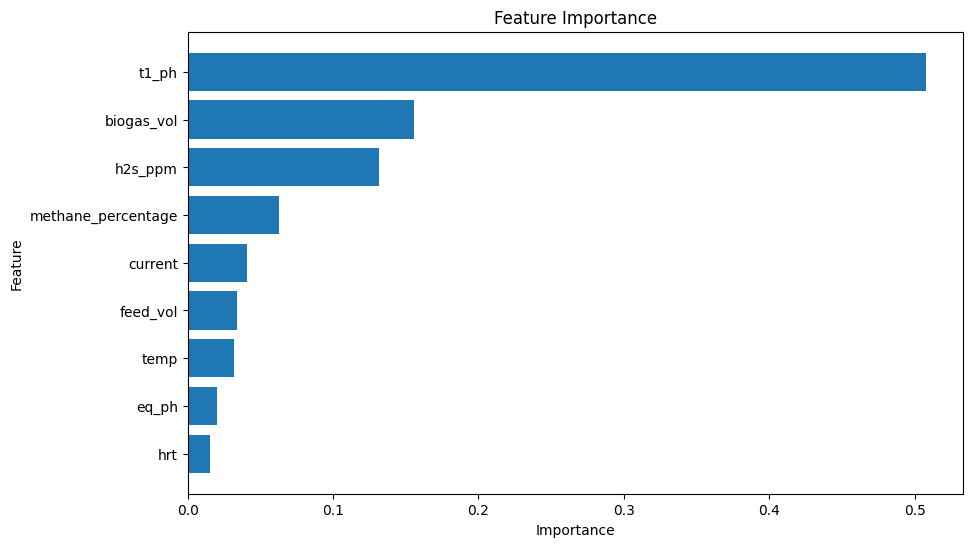

In [4]:

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




# Prepare the data
# Dropping the 'fostac' and 'date' columns to isolate the features
X = df_interpolated.drop(['fostac', 'date'], axis=1)
y = df_interpolated['fostac']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
# Initialize and train the Random Forest regressor
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Feature importance analysis
# Extract feature importances from the model
importances = model.feature_importances_
features = X_train.columns


# Sorting the features by importance
indices = np.argsort(importances)  # Get the indices of sorted importances
sorted_features = [features[i] for i in indices]  # Reorder the features
sorted_importances = importances[indices]  # Reorder the importances

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



In [5]:
display(df)


,date,eq_ph,feed_vol,t1_ph,current,temp,methane_percentage,h2s_ppm,hrt,biogas_vol,fostac
0,2022-06-07,5.5,144.0,7.1,1652.0,36.8,65.1,99.0,25.0,1232.0,0.53
1,2022-06-08,5.3,144.0,7.2,1652.0,36.8,68.0,1045.0,25.0,1019.0,0.34
2,2022-06-09,5.2,144.0,7.3,1652.0,36.8,70.9,879.0,25.0,1005.0,0.15
3,2022-06-10,5.2,192.0,7.3,1652.0,34.8,65.7,983.0,19.0,892.0,0.19
4,2022-06-11,NaN,192.0,NaN,1652.0,NaN,65.7,NaN,19.0,1100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN
150,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN
151,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN
152,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from keras_tuner import RandomSearch, HyperModel
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, explained_variance_score
import os
import json

np.random.seed(42)
tf.random.set_seed(42)

# Data preparation
df = df_interpolated.copy()  # Assuming df_interpolated is previously defined
target = 'fostac'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=[target], inplace=True)
num_features = df.shape[1] - 1

scaler = RobustScaler()
X = df.drop(columns=[target])
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define model hyperparameter tuning
class MyModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Input(shape=(num_features,)))
        
        num_layers = hp.Int('num_layers', 1, 8)
        for i in range(num_layers):
            model.add(Dense(hp.Int(f'units_{i}', 32, 128, 32), activation='relu'))

        model.add(Dense(1, activation='relu'))
        model.compile(
            optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
            loss='mae',
            metrics=['mae']
        )
        return model

# Directories setup
base_save_dir = 'ANN_hyperparams'
os.makedirs(base_save_dir, exist_ok=True)
figures_folder = os.path.join(base_save_dir, 'figures')
os.makedirs(figures_folder, exist_ok=True)

# Early stopping to restore best weights
early_stopping = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Hyperparameter tuning with RandomSearch
tuner = RandomSearch(
    MyModel(),
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory=os.path.join(base_save_dir, 'tuner'),
    project_name='mec_ad_model',
    seed=42
)

# Start hyperparameter search
tuner.search(
    X_train_scaled, y_train,
    epochs=200,
    validation_data=(X_val_scaled, y_val),
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# Explicitly build and retrain the best model
best_hp = tuner.get_best_hyperparameters()[0]
best_model = MyModel().build(best_hp)

# Retrain explicitly on the training data
best_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_data=(X_val_scaled, y_val),
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# Save best hyperparameters
filtered_hyperparams = best_hp.values
hyperparams_path = 'ANN_hyperparams/best_hyperparameters.json'
with open(hyperparams_path, 'w') as hp_file:
    json.dump(filtered_hyperparams, hp_file, indent=4)



Reloading Tuner from ANN_hyperparams/tuner/mec_ad_model/tuner0.json
Epoch 1/200


2025-03-13 15:16:33.057486: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3019 - mae: 0.3019 - val_loss: 0.1903 - val_mae: 0.1903
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2259 - mae: 0.2259 - val_loss: 0.1508 - val_mae: 0.1508
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1833 - mae: 0.1833 - val_loss: 0.1373 - val_mae: 0.1373
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1566 - mae: 0.1566 - val_loss: 0.1243 - val_mae: 0.1243
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1383 - mae: 0.1383 - val_loss: 0.1171 - val_mae: 0.1171
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1274 - mae: 0.1274 - val_loss: 0.1132 - val_mae: 0.1132
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1186 - mae: 0.1186 - val_loss: 0.1079 - val_mae: 0.1079
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1129 - mae: 0.1129 - val_loss: 0.1056 - val_mae: 0.1056
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1058 - mae: 0.1058 - val_loss

In [7]:
# Save the best model explicitly
model_save_path = 'ANN_hyperparams/best_model.keras'
best_model.save(model_save_path)

# Evaluate best model
y_pred = best_model.predict(X_val_scaled).flatten()
mae = np.mean(np.abs(y_val - y_pred))
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
explained_variance = explained_variance_score(y_val, y_pred)
nrmse = rmse / np.std(y_val)

# Print evaluation metrics
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'NRMSE: {nrmse:.4f}')
print(f'Explained Variance: {explained_variance:.4f}')

# Create figures directory
figures_folder = 'ANN_hyperparams/figures'
os.makedirs(figures_folder, exist_ok=True)


results_df = pd.DataFrame({
    'true': y_val,
    'predicted': y_pred
}, index=y_val.index).sort_index()
results_df.reset_index(inplace=True)


# Plot validation predictions vs true values (sorted)
plt.figure(figsize=(12, 5))
plt.plot(results_df['date'], results_df['true'], label='True Values', color='blue')
plt.plot(results_df['date'], results_df['predicted'], label='Predictions', color='orange')
plt.title('Model Predictions vs True Values (Validation Set)')
plt.xlabel('Date')
plt.ylabel('fostac')
plt.legend()

fig_path = os.path.join(figures_folder, 'validation_results_sorted.png')
plt.savefig(fig_path)
plt.close()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
MAE: 0.0582
RMSE: 0.0841
NRMSE: 0.3707
Explained Variance: 0.8742
